In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=fe6e3c7369463c8d25c7176698bf081b739560cad8aa44eaf4d010afafc7d47c
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
#importing all required libraries
import os
import re
import csv
import nltk
import keras
import string
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from nltk.tag import pos_tag
from keras.layers import Layer
from nltk import word_tokenize
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from keras.utils import plot_model
from keras.layers import Concatenate
from rouge_score import rouge_scorer
from nltk.tokenize import word_tokenize
from tensorflow.keras import Input, Model
from tensorflow.keras import backend as K
from wordcloud import STOPWORDS, WordCloud
from tensorflow.keras.models import load_model
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from sklearn.model_selection import train_test_split
from keras.models import Sequential, model_from_json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, TimeDistributed

In [ ]:
logger = tf.get_logger()
K.clear_session()
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/news_abstractive_text_summarization/Data/train.csv', nrows=11000)
dataframe.drop('id',axis='columns',inplace=True)
dataframe

,article,highlights
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...
10995,"By . Leon Watson . PUBLISHED: . 08:15 EST, 31 ...",Meeting between statesmen will take place in M...
10996,(CNN) -- The parents of an American journalist...,"Marc and Debra Tice: ""We urge you, whoever you..."
10997,Police chased the bus for 30 minutes through c...,Police chased the bus for 30 minutes through c...
10998,"(CNN) -- Inspired by Psalm 103 verse 11 -- ""Fo...","A golf course in Casey, Illinois hopes to soon..."


In [ ]:
dataframe.columns

Index(['article', 'highlights'], dtype='object')

In [ ]:
dataframe.isna().sum()

,0
article,0
highlights,0


In [ ]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
def clean_text(text, remove_stopwords=True):
    text = text.lower()
    text = text.split()
    tmp = []
    for word in text:
        if word in contractions:
            tmp.append(contractions[word])
        else:
            tmp.append(word)
    text = ' '.join(tmp)

    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)

    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words('english'))
        text = [w for w in text if w not in stops]
        text = ' '.join(text)

    return text

In [ ]:

clean_summaries = []
for summary in dataframe.highlights:
    clean_summaries.append(clean_text(summary, remove_stopwords=False))
print('Cleaning Summaries Complete')

clean_texts = []
for text in dataframe.article:
    clean_texts.append(clean_text(text))
print('Cleaning Texts Complete')
del dataframe

Cleaning Summaries Complete
Cleaning Texts Complete


In [ ]:
dataframe1 = pd.DataFrame()
dataframe1['text'] = clean_texts[:]
dataframe1['summary'] = clean_summaries[:]
dataframe1['summary'].replace('', np.nan, inplace=True)
dataframe1.dropna(axis=0, inplace=True)

In [ ]:
start_token = '<sostok>'
end_token = '<eostok>'
dataframe1.summary = dataframe1.summary.apply(lambda x: f'{start_token} {x} {end_token}')
dataframe1.head()

,text,summary
0,associated press published 14 11 est 25 octobe...,<sostok> bishop john folda of north dakota i...
1,cnn ralph mata internal affairs lieutenant mia...,<sostok> criminal complaint cop used his role...
2,drunk driver killed young woman head crash che...,<sostok> craig eccleston todd 27 had drunk a...
3,cnn breezy sweep pen president vladimir putin ...,<sostok> nina dos santos says europe must be r...
4,fleetwood team still 100 record sky bet league...,<sostok> fleetwood top of league one after 2 0...


In [ ]:
print(dataframe1.shape)

(11000, 2)


In [ ]:
#original text
dataframe1['text'][0]

'associated press published 14 11 est 25 october 2013 updated 15 36 est 25 october 2013 bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late september early october state health department issued advisory exposure anyone attended five churches took communion bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis state immunization program manager molly howell says risk low officials feel important alert people possible exposure diocese announced monday bishop john folda taking time diagnosed hepatitis diocese says contracted infection contaminated food attending conference newly ordained bishops italy last month symptoms hepatitis include fever tiredness loss appetite nausea abdominal discomfort fargo catholic diocese north dakota pictured bishop located'

In [ ]:
#text summary
dataframe1['summary'][0]

'<sostok> bishop john folda  of north dakota  is taking time off after being diagnosed   he contracted the infection through contaminated food in italy   church members in fargo  grand forks and jamestown could have been exposed   <eostok>'

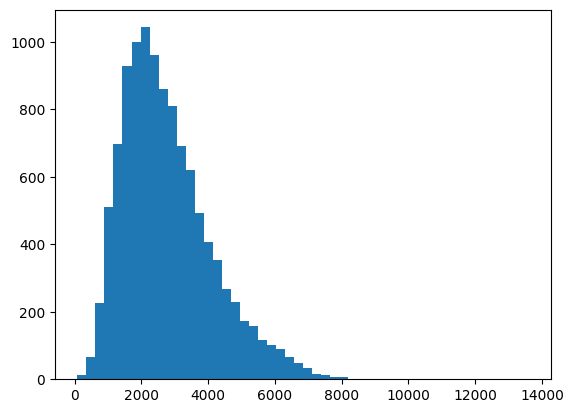

In [ ]:
text_lengths = []
for text in dataframe1['text']:
 text_lengths.append(len(text))
plt.hist(text_lengths, bins=50)
plt.show()

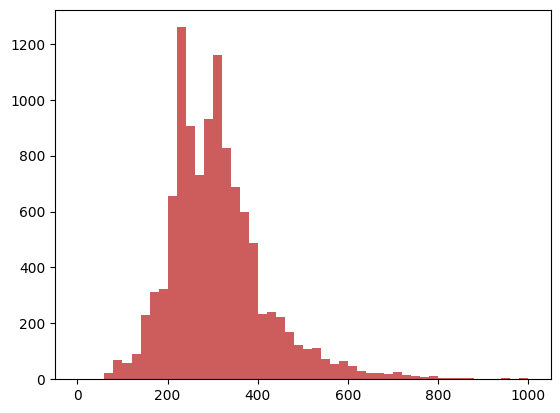

In [ ]:
summary_lengths = []
for summary_text in dataframe1['summary']:
 summary_lengths.append(len(summary_text))
plt.hist(summary_lengths, bins=50,range=(0,1000),color='indianred')
plt.show()


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(dataframe1['text'], dataframe1['summary'], test_size=0.2)
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.2)

Tokenization of Original Text

In [ ]:
t_max_features = 110788
s_max_features = 36188

In [ ]:
x_tokenizer = Tokenizer(num_words = t_max_features)
x_tokenizer.fit_on_texts(list(np.array((dataframe1['text']))))
max_text_len = 800
# one-hot-encoding
x_train_sequence = x_tokenizer.texts_to_sequences(np.array(X_train))
x_val_sequence = x_tokenizer.texts_to_sequences(np.array(X_val))
x_test_sequence = x_tokenizer.texts_to_sequences(np.array(X_test))
# padding upto max_text_len
x_train_padded = pad_sequences(x_train_sequence, maxlen=max_text_len, padding='post')
x_val_padded = pad_sequences(x_val_sequence, maxlen=max_text_len, padding='post')
x_test_padded = pad_sequences(x_test_sequence, maxlen=max_text_len, padding='post')
# if you're not using num_words parameter in Tokenizer then use this
x_vocab_size = len(x_tokenizer.word_index) + 1
print(x_vocab_size)

110788


In [ ]:
pickle.dump(x_tokenizer,open('/content/drive/MyDrive/news_abstractive_text_summarization/Models/x_tokenizer.pkl', 'wb'))

Tokenization for Summary

In [ ]:
y_tokenizer = Tokenizer(num_words = s_max_features)
y_tokenizer.fit_on_texts(list(np.array(dataframe1['summary'])))
max_summary_len = 150
# one-hot-encoding
y_train_sequence = y_tokenizer.texts_to_sequences(np.array(y_train))
y_val_sequence = y_tokenizer.texts_to_sequences(np.array(y_val))
y_test_sequence = y_tokenizer.texts_to_sequences(np.array(y_test))
# padding upto max_summary_len
y_train_padded = pad_sequences(y_train_sequence, maxlen=max_summary_len, padding='post')
y_val_padded = pad_sequences(y_val_sequence, maxlen=max_summary_len, padding='post')
y_test_padded = pad_sequences(y_test_sequence, maxlen=max_summary_len, padding='post')
# if you're not using num_words parameter in Tokenizer then use this
y_vocab_size = len(y_tokenizer.word_index) + 1
print(y_vocab_size)
embed_dim = 300

36188


In [ ]:
pickle.dump(y_tokenizer,open('/content/drive/MyDrive/news_abstractive_text_summarization/Models/y_tokenizer.pkl', 'wb'))

In [ ]:
epoch_num = 30 #30

# Model1 :- LSTM without Embedding

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 800)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 800, 300)             3323640   ['input_1[0][0]']             
                                                          0                                       
                                                                                                  
 embedding_1 (Embedding)     (None, None, 300)            1085640   ['input_2[0][0]']         

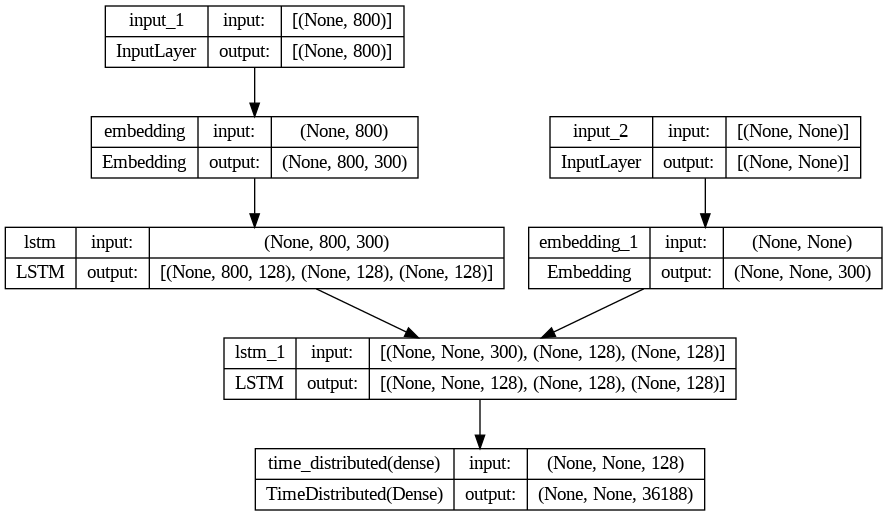

In [ ]:
latent_dim = 128
# Encoder
enc_input = Input(shape=(max_text_len, ))
enc_embed = Embedding(t_max_features, embed_dim, input_length=max_text_len, trainable=False)(enc_input)
h_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
h_out, enc_h, enc_c = h_lstm(enc_embed)
#Decoder
dec_input = Input(shape=(None, ))
dec_embed = Embedding(s_max_features, embed_dim, trainable=False)(dec_input)
dec_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
dec_outputs, _, _ = dec_lstm(dec_embed, initial_state=[enc_h, enc_c])

dec_dense = TimeDistributed(Dense(s_max_features, activation='softmax'))
dec_output = dec_dense(dec_outputs)

model = Model([enc_input, dec_input], dec_output)
model.summary()

plot_model(
    model,
    to_file='./seq2seq_encoder_decoder.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit([x_train_padded, y_train_padded[:, :-1]], y_train_padded.reshape(y_train_padded.shape[0],
          y_train_padded.shape[1], 1)[:, 1:],
          epochs=epoch_num,
          batch_size=32,
          verbose=1,
          validation_data=([x_val_padded, y_val_padded[:, :-1]], y_val_padded.reshape(y_val_padded.shape[0],
          y_val_padded.shape[1], 1)[:, 1:]))

Epoch 1/20
220/220 [==============================] - 120s 507ms/step - loss: 3.8026 - accuracy: 0.6604 - val_loss: 2.6851 - val_accuracy: 0.6711
Epoch 2/20
220/220 [==============================] - 111s 506ms/step - loss: 2.6554 - accuracy: 0.6706 - val_loss: 2.6186 - val_accuracy: 0.6776
Epoch 3/20
220/220 [==============================] - 112s 509ms/step - loss: 2.6109 - accuracy: 0.6748 - val_loss: 2.5949 - val_accuracy: 0.6770
Epoch 4/20
220/220 [==============================] - 111s 503ms/step - loss: 2.5934 - accuracy: 0.6759 - val_loss: 2.5874 - val_accuracy: 0.6783
Epoch 5/20
220/220 [==============================] - 111s 503ms/step - loss: 2.5860 - accuracy: 0.6762 - val_loss: 2.5862 - val_accuracy: 0.6782
Epoch 6/20
220/220 [==============================] - 110s 502ms/step - loss: 2.5815 - accuracy: 0.6764 - val_loss: 2.5835 - val_accuracy: 0.6787
Epoch 7/20
220/220 [==============================] - 112s 508ms/step - loss: 2.5779 - accuracy: 0.6767 - val_loss: 2.5819 -

In [ ]:
enc_model = Model(inputs=enc_input, outputs=[enc_h, enc_c])

dec_init_state_h = Input(shape=(latent_dim, ))
dec_init_state_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

dec_out, dec_h, dec_c = dec_lstm(dec_embed, initial_state=[dec_init_state_h, dec_init_state_c])
dec_final = dec_dense(dec_out)

dec_model = Model([dec_input]+[dec_init_state_h, dec_init_state_c], [dec_final]+[dec_h, dec_c])

In [ ]:
def generate_summary(input_seq):
    h, c = enc_model.predict(input_seq)

    next_token = np.zeros((1, 1))
    next_token[0, 0] = y_tokenizer.word_index['sostok']
    output_seq = ''

    stop = False
    count = 0

    while not stop:
        if count > 100:
            break
        decoder_out, state_h, state_c = dec_model.predict([next_token]+[h, c])
        token_idx = np.argmax(decoder_out[0, -1, :])

        if token_idx == y_tokenizer.word_index['eostok']:
            stop = True
        elif token_idx > 0 and token_idx != y_tokenizer.word_index['sostok']:
            token = y_tokenizer.index_word[token_idx]
            output_seq = output_seq + ' ' + token

        next_token = np.zeros((1, 1))
        next_token[0, 0] = token_idx
        h, c = state_h, state_c
        count += 1

    return output_seq

In [ ]:
test_inputs = [clean_text(sent) for sent in X_test]
test_inputs = x_tokenizer.texts_to_sequences(list(test_inputs))
test_inputs = pad_sequences(test_inputs, maxlen=max_text_len, padding='post')

In [ ]:
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
hyps = []
with open('/content/drive/MyDrive/news_abstractive_text_summarization/output_file/result1.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Article', 'Original Summary', 'Model Output'])
    for i in range(10):
        our_summ = generate_summary(test_inputs[i].reshape(1, max_text_len))
        hyps.append(our_summ)
        writer.writerow([X_test[i], y_test[i], our_summ])

1/1 [==============================] - 0s 19ms/step


In [ ]:
pred_df = pd.read_csv('/content/drive/MyDrive/news_abstractive_text_summarization/output_file/result1.csv')
org_summary = pred_df['Original Summary']
pred_summary =  pred_df['Model Output']

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1'])
results = {'precision': [], 'recall': [], 'fmeasure': []}
for (h, r) in zip(org_summary, pred_summary):
  # computing the ROUGE
  score = scorer.score(h, r)
  # separating the measurements
  precision, recall, fmeasure = score['rouge1']
  # add them to the proper list in the dictionary
  results['precision'].append(precision)
  results['recall'].append(recall)
  results['fmeasure'].append(fmeasure)
result = pd.DataFrame(results)
result

,precision,recall,fmeasure
0,0.057143,0.035088,0.043478
1,0.171429,0.150000,0.160000
2,0.157895,0.084507,0.110092
3,0.057143,0.028571,0.038095
4,0.114286,0.045455,0.065041
5,0.105263,0.097561,0.101266
6,0.200000,0.125000,0.153846
7,0.028571,0.026316,0.027397
8,0.085714,0.078947,0.082192
9,0.000000,0.000000,0.000000


# Model2 :- BILSTM without Embedding

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 800)]                0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 800, 300)             3323640   ['input_6[0][0]']             
                                                          0                                       
                                                                                                  
 input_7 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 bidirectional (Bidirection  [(None, 256),                439296    ['embedding_2[0][0]']   

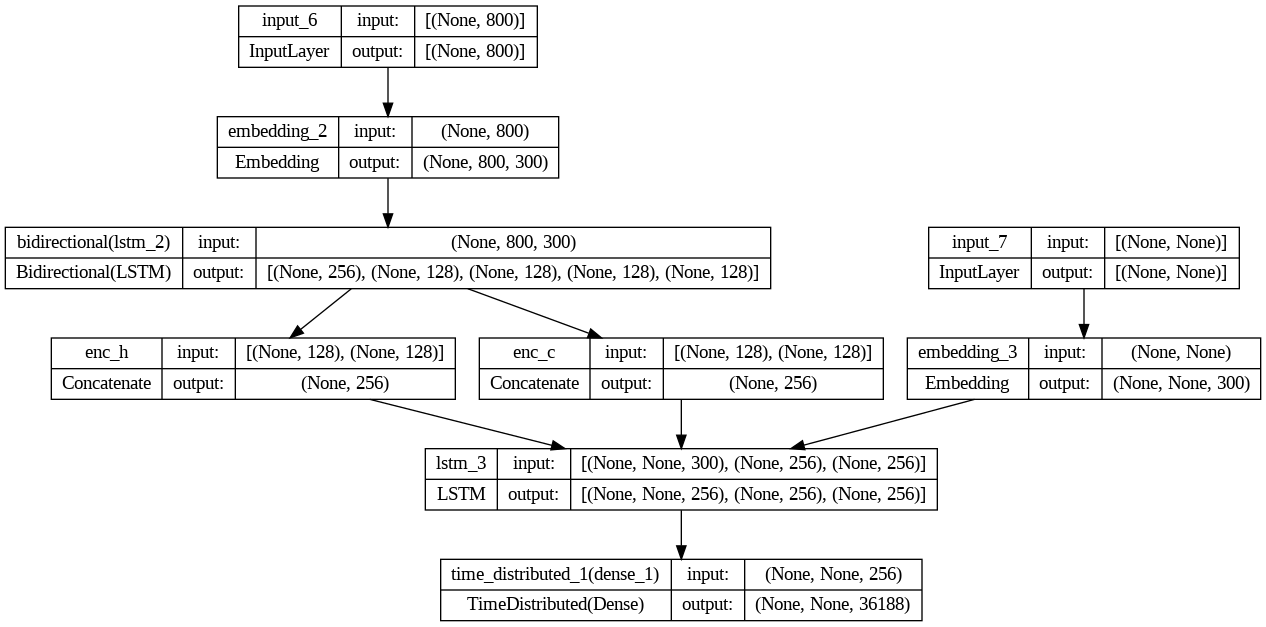

In [ ]:
latent_dim = 128
# Encoder
enc_input = Input(shape=(max_text_len, ))
enc_embed = Embedding(t_max_features, embed_dim, input_length=max_text_len, trainable=True)(enc_input)
enc_lstm = Bidirectional(LSTM(latent_dim, return_state=True))
enc_output, enc_fh, enc_fc, enc_bh, enc_bc = enc_lstm(enc_embed)
enc_h = Concatenate(axis=-1, name='enc_h')([enc_fh, enc_bh])
enc_c = Concatenate(axis=-1, name='enc_c')([enc_fc, enc_bc])
#Decoder
dec_input = Input(shape=(None, ))
dec_embed = Embedding(s_max_features, embed_dim, trainable=True)(dec_input)
dec_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
dec_outputs, _, _ = dec_lstm(dec_embed, initial_state=[enc_h, enc_c])

dec_dense = TimeDistributed(Dense(s_max_features, activation='softmax'))
dec_output = dec_dense(dec_outputs)

model = Model([enc_input, dec_input], dec_output)
model.summary()

plot_model(
    model,
    to_file='./seq2seq_encoder_decoder.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit([x_train_padded, y_train_padded[:, :-1]], y_train_padded.reshape(y_train_padded.shape[0],
          y_train_padded.shape[1], 1)[:, 1:],
          epochs=epoch_num,
          batch_size=32,
          verbose=1,
          validation_data=([x_val_padded, y_val_padded[:, :-1]], y_val_padded.reshape(y_val_padded.shape[0],
          y_val_padded.shape[1], 1)[:, 1:]))

Epoch 1/20
220/220 [==============================] - 186s 809ms/step - loss: 3.2422 - accuracy: 0.6644 - val_loss: 2.6101 - val_accuracy: 0.6780
Epoch 2/20
220/220 [==============================] - 163s 740ms/step - loss: 2.6039 - accuracy: 0.6759 - val_loss: 2.5910 - val_accuracy: 0.6780
Epoch 3/20
220/220 [==============================] - 155s 703ms/step - loss: 2.5819 - accuracy: 0.6781 - val_loss: 2.5658 - val_accuracy: 0.6811
Epoch 4/20
220/220 [==============================] - 156s 708ms/step - loss: 2.5537 - accuracy: 0.6800 - val_loss: 2.5472 - val_accuracy: 0.6824
Epoch 5/20
220/220 [==============================] - 150s 680ms/step - loss: 2.5342 - accuracy: 0.6809 - val_loss: 2.5357 - val_accuracy: 0.6831
Epoch 6/20
220/220 [==============================] - 147s 667ms/step - loss: 2.5205 - accuracy: 0.6816 - val_loss: 2.5273 - val_accuracy: 0.6843
Epoch 7/20
220/220 [==============================] - 145s 660ms/step - loss: 2.5093 - accuracy: 0.6820 - val_loss: 2.5183 -

In [ ]:
enc_model = Model(inputs=enc_input, outputs=[enc_h, enc_c])

dec_init_state_h = Input(shape=(latent_dim*2, ))
dec_init_state_c = Input(shape=(latent_dim*2, ))

dec_out, dec_h, dec_c = dec_lstm(dec_embed, initial_state=[dec_init_state_h, dec_init_state_c])
dec_final = dec_dense(dec_out)

dec_model = Model([dec_input]+[dec_init_state_h, dec_init_state_c], [dec_final]+[dec_h, dec_c])

In [ ]:
def generate_summary(input_seq):
    h, c = enc_model.predict(input_seq)

    next_token = np.zeros((1, 1))
    next_token[0, 0] = y_tokenizer.word_index['sostok']
    output_seq = ''

    stop = False
    count = 0

    while not stop:
        if count > 100:
            break
        decoder_out, state_h, state_c = dec_model.predict([next_token]+[h, c])
        token_idx = np.argmax(decoder_out[0, -1, :])

        if token_idx == y_tokenizer.word_index['eostok']:
            stop = True
        elif token_idx > 0 and token_idx != y_tokenizer.word_index['sostok']:
            token = y_tokenizer.index_word[token_idx]
            output_seq = output_seq + ' ' + token

        next_token = np.zeros((1, 1))
        next_token[0, 0] = token_idx
        h, c = state_h, state_c
        count += 1

    return output_seq

In [ ]:
test_inputs = [clean_text(sent) for sent in X_test]
test_inputs = x_tokenizer.texts_to_sequences(list(test_inputs))
test_inputs = pad_sequences(test_inputs, maxlen=max_text_len, padding='post')

In [ ]:
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
hyps = []
with open('/content/drive/MyDrive/news_abstractive_text_summarization/output_file/result2.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Article', 'Original Summary', 'Model Output'])
    for i in range(10):
        our_summ = generate_summary(test_inputs[i].reshape(1, max_text_len))
        hyps.append(our_summ)
        writer.writerow([X_test[i], y_test[i], our_summ])

1/1 [==============================] - 0s 22ms/step


In [ ]:
pred_df = pd.read_csv('/content/drive/MyDrive/news_abstractive_text_summarization/output_file/result2.csv')
org_summary = pred_df['Original Summary']
pred_summary =  pred_df['Model Output']

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1'])
results = {'precision': [], 'recall': [], 'fmeasure': []}
for (h, r) in zip(org_summary, pred_summary):
  # computing the ROUGE
  score = scorer.score(h, r)
  # separating the measurements
  precision, recall, fmeasure = score['rouge1']
  # add them to the proper list in the dictionary
  results['precision'].append(precision)
  results['recall'].append(recall)
  results['fmeasure'].append(fmeasure)
result = pd.DataFrame(results)
result

,precision,recall,fmeasure
0,0.089109,0.157895,0.113924
1,0.079208,0.200000,0.113475
2,0.118812,0.169014,0.139535
3,0.069307,0.100000,0.081871
4,0.108911,0.125000,0.116402
5,0.059406,0.146341,0.084507
6,0.118812,0.214286,0.152866
7,0.039604,0.105263,0.057554
8,0.019802,0.052632,0.028777
9,0.029703,0.069767,0.041667


# Model3 :- LSTM + Attention with GloVe Embedding

In [ ]:
embeding_index = {}
embed_dim = 300
with open('/content/drive/MyDrive/news_abstractive_text_summarization/glove.6B.300d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeding_index[word] = coefs


In [ ]:
t_embed = np.zeros((t_max_features, embed_dim))
for word, i in x_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < t_max_features and vec is not None:
        t_embed[i] = vec

In [ ]:
s_embed = np.zeros((s_max_features, embed_dim))
for word, i in y_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < s_max_features and vec is not None:
        s_embed[i] = vec

In [ ]:
del embeding_index

In [ ]:
class AttentionLayer(tf.keras.layers.Layer):

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.
        print(input_shape)
        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs

        logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
        logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            logger.debug("Running energy computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

            logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

            logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            logger.debug(f"ei.shape = {e_i.shape}")

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            logger.debug("Running attention vector computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

            logger.debug(f"ci.shape = {c_i.shape}")

            return c_i, [c_i]

        # we don't maintain states between steps when computing attention
        # attention is stateless, so we're passing a fake state for RNN step function
        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e], constants=[encoder_out_seq]
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c], constants=[encoder_out_seq]
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

[TensorShape([None, 800, 128]), TensorShape([None, None, 128])]
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 800)]                0         []                            
                                                                                                  
 input_11 (InputLayer)       [(None, None)]               0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 800, 300)             3323640   ['input_10[0][0]']            
                                                          0                                       
                                                                                                  
 embedding_5 (Embedding)    

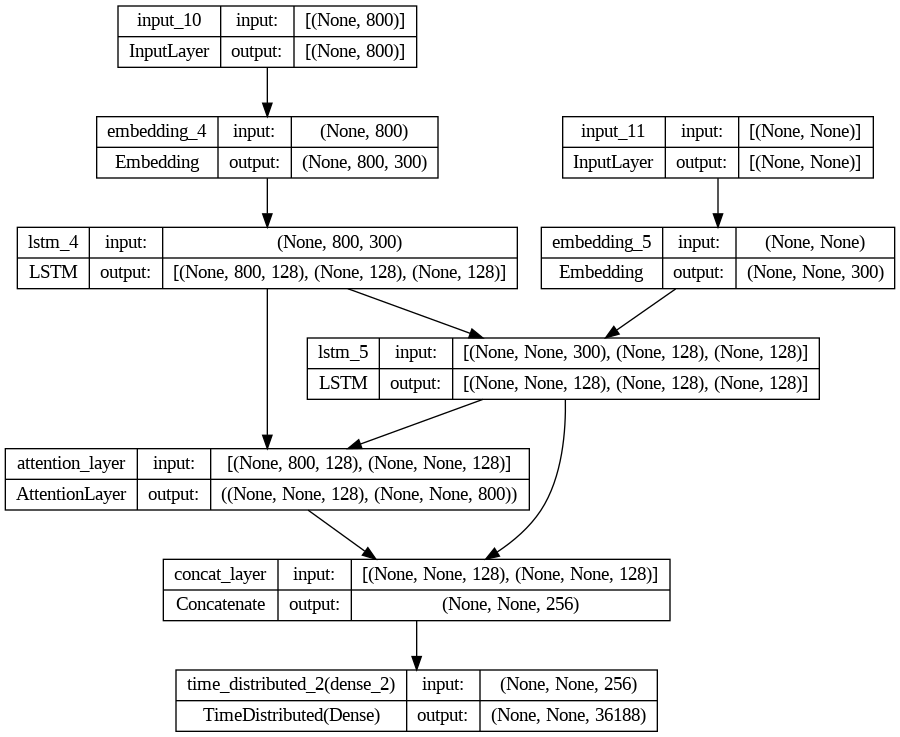

In [ ]:
latent_dim = 128
# Encoder
enc_input = Input(shape=(max_text_len, ))
enc_embed = Embedding(t_max_features, embed_dim, input_length=max_text_len, weights=[t_embed], trainable=False)(enc_input)
h_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
h_out, enc_h, enc_c = h_lstm(enc_embed)
#Decoder
dec_input = Input(shape=(None, ))
dec_embed = Embedding(s_max_features, embed_dim, trainable=False)(dec_input)
dec_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
dec_outputs, _, _ = dec_lstm(dec_embed, initial_state=[enc_h, enc_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([h_out, dec_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([dec_outputs, attn_out])

dec_dense = TimeDistributed(Dense(s_max_features, activation='softmax'))
dec_output = dec_dense(decoder_concat_input)

model = Model([enc_input, dec_input], dec_output)
model.summary()

plot_model(
    model,
    to_file='./seq2seq_encoder_decoder.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit([x_train_padded, y_train_padded[:, :-1]], y_train_padded.reshape(y_train_padded.shape[0],
          y_train_padded.shape[1], 1)[:, 1:],
          epochs=epoch_num,
          batch_size=32,
          verbose=1,
          validation_data=([x_val_padded, y_val_padded[:, :-1]], y_val_padded.reshape(y_val_padded.shape[0],
          y_val_padded.shape[1], 1)[:, 1:]
          ) )

Epoch 1/20
220/220 [==============================] - 214s 939ms/step - loss: 3.2698 - accuracy: 0.6625 - val_loss: 2.6436 - val_accuracy: 0.6729
Epoch 2/20
220/220 [==============================] - 207s 940ms/step - loss: 2.6275 - accuracy: 0.6729 - val_loss: 2.6014 - val_accuracy: 0.6781
Epoch 3/20
220/220 [==============================] - 211s 961ms/step - loss: 2.5965 - accuracy: 0.6757 - val_loss: 2.5894 - val_accuracy: 0.6770
Epoch 4/20
220/220 [==============================] - 206s 935ms/step - loss: 2.5857 - accuracy: 0.6762 - val_loss: 2.5857 - val_accuracy: 0.6785
Epoch 5/20
220/220 [==============================] - 210s 955ms/step - loss: 2.5801 - accuracy: 0.6763 - val_loss: 2.5872 - val_accuracy: 0.6770
Epoch 6/20
220/220 [==============================] - 206s 939ms/step - loss: 2.5759 - accuracy: 0.6766 - val_loss: 2.5860 - val_accuracy: 0.6783
Epoch 7/20
220/220 [==============================] - 210s 955ms/step - loss: 2.5721 - accuracy: 0.6769 - val_loss: 2.5838 -

In [ ]:
enc_model = Model(inputs=enc_input, outputs=[h_out, enc_h, enc_c])

dec_init_state_h = Input(shape=(latent_dim, ))
dec_init_state_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence

dec_out2, dec_h, dec_c = dec_lstm(dec_embed, initial_state=[dec_init_state_h, dec_init_state_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, dec_out2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([dec_out2, attn_out_inf])


dec_final = dec_dense(decoder_inf_concat)

dec_model = Model([dec_input]+[decoder_hidden_state_input,dec_init_state_h, dec_init_state_c], [dec_final]+[dec_h, dec_c])

In [ ]:
def generate_summary(input_seq):
    e_out, h, c = enc_model.predict(input_seq)

    next_token = np.zeros((1, 1))
    next_token[0, 0] = y_tokenizer.word_index['sostok']
    output_seq = ''

    stop = False
    count = 0

    while not stop:
        if count > 100:
            break
        decoder_out, state_h, state_c = dec_model.predict([next_token]+[e_out, h, c])
        token_idx = np.argmax(decoder_out[0, -1, :])

        if token_idx == y_tokenizer.word_index['eostok']:
            stop = True
        elif token_idx > 0 and token_idx != y_tokenizer.word_index['sostok']:
            token = y_tokenizer.index_word[token_idx]
            output_seq = output_seq + ' ' + token

        next_token = np.zeros((1, 1))
        next_token[0, 0] = token_idx
        h, c = state_h, state_c
        count += 1

    return output_seq

In [ ]:
test_inputs = [clean_text(sent) for sent in X_test]
test_inputs = x_tokenizer.texts_to_sequences(list(test_inputs))
test_inputs = pad_sequences(test_inputs, maxlen=max_text_len, padding='post')

In [ ]:
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
test_inputs[1].reshape(1, max_text_len).shape

(1, 800)

In [ ]:
hyps = []
with open('/content/drive/MyDrive/news_abstractive_text_summarization/output_file/result3.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Article', 'Original Summary', 'Model Output'])
    for i in range(10):
        our_summ = generate_summary(test_inputs[i].reshape(1, max_text_len))
        hyps.append(our_summ)
        writer.writerow([X_test[i], y_test[i], our_summ])

1/1 [==============================] - 0s 30ms/step


In [ ]:
pred_df = pd.read_csv('/content/drive/MyDrive/news_abstractive_text_summarization/output_file/result3.csv')
org_summary = pred_df['Original Summary']
pred_summary =  pred_df['Model Output']

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1'])
results = {'precision': [], 'recall': [], 'fmeasure': []}
for (h, r) in zip(org_summary, pred_summary):
  # computing the ROUGE
  score = scorer.score(h, r)
  # separating the measurements
  precision, recall, fmeasure = score['rouge1']
  # add them to the proper list in the dictionary
  results['precision'].append(precision)
  results['recall'].append(recall)
  results['fmeasure'].append(fmeasure)
result = pd.DataFrame(results)
result

,precision,recall,fmeasure
0,0.04000,0.035088,0.037383
1,0.12000,0.150000,0.133333
2,0.12000,0.084507,0.099174
3,0.04000,0.028571,0.033333
4,0.08000,0.045455,0.057971
5,0.08000,0.097561,0.087912
6,0.14000,0.125000,0.132075
7,0.02000,0.026316,0.022727
8,0.06383,0.078947,0.070588
9,0.00000,0.000000,0.000000


# Model4 :- BILSTM + Attention with GloVe Embedding

In [ ]:
embeding_index = {}
embed_dim = 300
with open('/content/drive/MyDrive/news_abstractive_text_summarization/glove.6B.300d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeding_index[word] = coefs


In [ ]:
t_embed = np.zeros((t_max_features, embed_dim))
for word, i in x_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < t_max_features and vec is not None:
        t_embed[i] = vec

In [ ]:
s_embed = np.zeros((s_max_features, embed_dim))
for word, i in y_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < s_max_features and vec is not None:
        s_embed[i] = vec

In [ ]:
del embeding_index

In [ ]:
class AttentionLayer(tf.keras.layers.Layer):

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.
        print(input_shape)
        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs

        logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
        logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            logger.debug("Running energy computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

            logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

            logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            logger.debug(f"ei.shape = {e_i.shape}")

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            logger.debug("Running attention vector computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

            logger.debug(f"ci.shape = {c_i.shape}")

            return c_i, [c_i]

        # we don't maintain states between steps when computing attention
        # attention is stateless, so we're passing a fake state for RNN step function
        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e], constants=[encoder_out_seq]
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c], constants=[encoder_out_seq]
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

[TensorShape([None, 800, 256]), TensorShape([None, None, 256])]
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 800)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 800, 300)             3323640   ['input_1[0][0]']             
                                                          0                                       
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 bidirectional (Bidirection  [

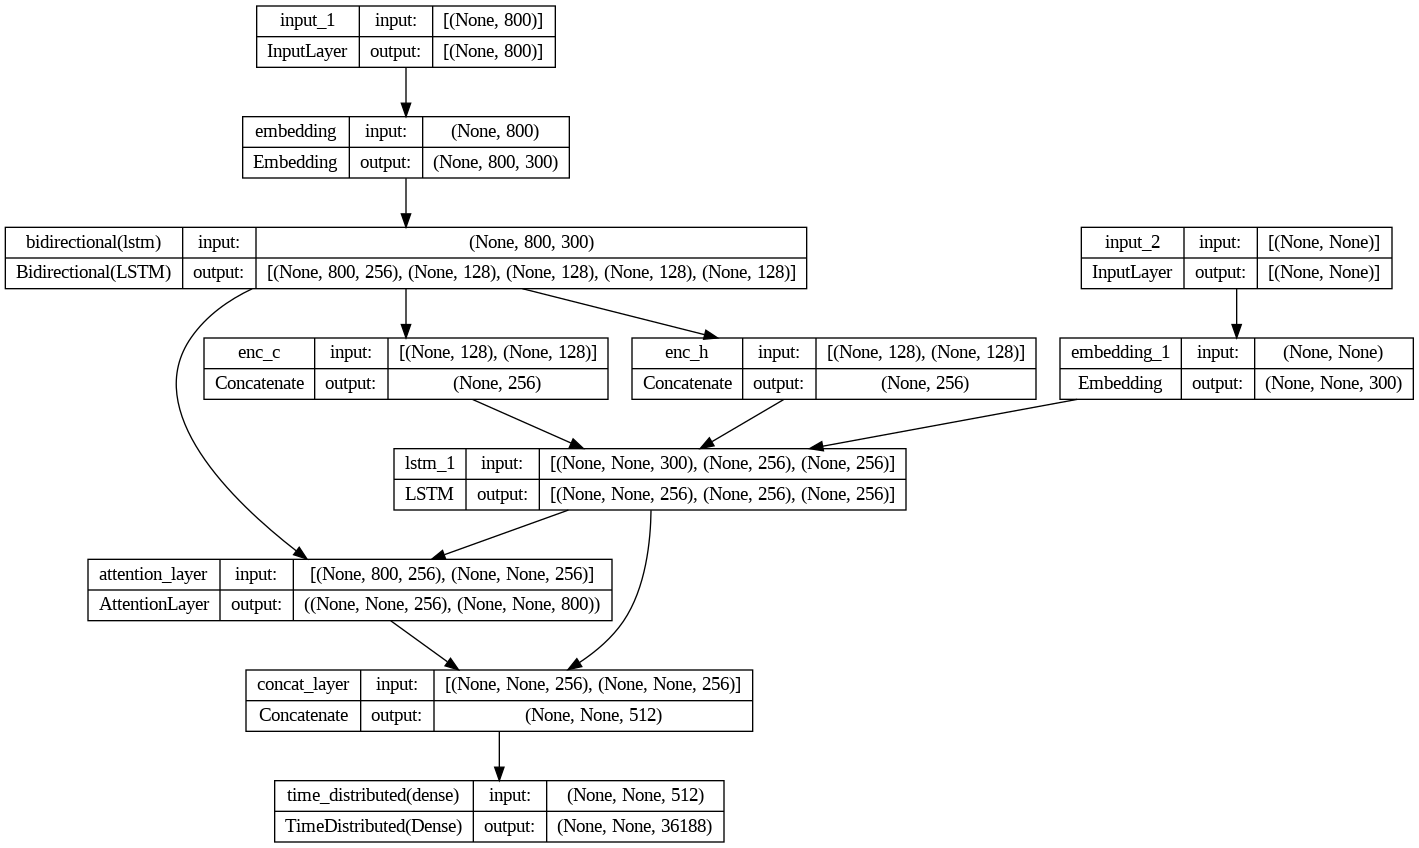

In [ ]:
latent_dim = 128
# Encoder
enc_input = Input(shape=(max_text_len, ))
enc_embed = Embedding(t_max_features, embed_dim, input_length=max_text_len, weights=[t_embed], trainable=False)(enc_input)
enc_lstm = Bidirectional(LSTM(latent_dim, return_sequences=True, return_state=True))
enc_output, enc_fh, enc_fc, enc_bh, enc_bc = enc_lstm(enc_embed)
enc_h = Concatenate(axis=-1, name='enc_h')([enc_fh, enc_bh])
enc_c = Concatenate(axis=-1, name='enc_c')([enc_fc, enc_bc])
#Decoder
dec_input = Input(shape=(None, ))
dec_embed = Embedding(s_max_features, embed_dim, weights=[s_embed], trainable=True)(dec_input)
dec_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
dec_outputs, _, _ = dec_lstm(dec_embed, initial_state=[enc_h, enc_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([enc_output, dec_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([dec_outputs, attn_out])

dec_dense = TimeDistributed(Dense(s_max_features, activation='softmax'))
dec_output = dec_dense(decoder_concat_input)

model = Model([enc_input, dec_input], dec_output)
model.summary()

plot_model(
    model,
    to_file='./seq2seq_encoder_decoder.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([x_train_padded, y_train_padded[:, :-1]], y_train_padded.reshape(y_train_padded.shape[0],
          y_train_padded.shape[1], 1)[:, 1:],
          epochs=epoch_num,
          batch_size=16,
          verbose=1,
          validation_data=([x_val_padded, y_val_padded[:, :-1]], y_val_padded.reshape(y_val_padded.shape[0],
          y_val_padded.shape[1], 1)[:, 1:]
          ) )

Epoch 1/30
220/220 [==============================] - 383s 2s/step - loss: 3.1430 - accuracy: 0.6685 - val_loss: 2.5866 - val_accuracy: 0.6798
Epoch 2/30
220/220 [==============================] - 361s 2s/step - loss: 2.5171 - accuracy: 0.6838 - val_loss: 2.4796 - val_accuracy: 0.6904
Epoch 3/30
220/220 [==============================] - 355s 2s/step - loss: 2.3767 - accuracy: 0.6929 - val_loss: 2.3711 - val_accuracy: 0.6973
Epoch 4/30
220/220 [==============================] - 353s 2s/step - loss: 2.2387 - accuracy: 0.6991 - val_loss: 2.2979 - val_accuracy: 0.7014
Epoch 5/30
220/220 [==============================] - 367s 2s/step - loss: 2.1205 - accuracy: 0.7035 - val_loss: 2.2481 - val_accuracy: 0.7041
Epoch 6/30
220/220 [==============================] - 353s 2s/step - loss: 2.0122 - accuracy: 0.7073 - val_loss: 2.2169 - val_accuracy: 0.7061
Epoch 7/30
220/220 [==============================] - 352s 2s/step - loss: 1.9150 - accuracy: 0.7107 - val_loss: 2.1968 - val_accuracy: 0.7079

In [ ]:
enc_model = Model(inputs=enc_input, outputs=[enc_output,enc_h, enc_c])

dec_init_state_h = Input(shape=(latent_dim*2, ))
dec_init_state_c = Input(shape=(latent_dim*2, ))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim*2))

# Get the embeddings of the decoder sequence

dec_out2, dec_h, dec_c = dec_lstm(dec_embed, initial_state=[dec_init_state_h, dec_init_state_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, dec_out2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([dec_out2, attn_out_inf])


dec_final = dec_dense(decoder_inf_concat)

dec_model = Model([dec_input]+[decoder_hidden_state_input,dec_init_state_h, dec_init_state_c], [dec_final]+[dec_h, dec_c])

In [ ]:
# Save encoder model
enc_model.save('/content/drive/MyDrive/news_abstractive_text_summarization/Models/encoder_model.h5')

# Save decoder model
dec_model.save('/content/drive/MyDrive/news_abstractive_text_summarization/Models/decoder_model.h5')

In [ ]:
def generate_summary(input_seq):
    e_out, h, c = enc_model.predict(input_seq)

    next_token = np.zeros((1, 1))
    next_token[0, 0] = y_tokenizer.word_index['sostok']
    output_seq = ''

    stop = False
    count = 0

    while not stop:
        if count > 100:
            break
        decoder_out, state_h, state_c = dec_model.predict([next_token]+[e_out, h, c])
        token_idx = np.argmax(decoder_out[0, -1, :])

        if token_idx == y_tokenizer.word_index['eostok']:
            stop = True
        elif token_idx > 0 and token_idx != y_tokenizer.word_index['sostok']:
            token = y_tokenizer.index_word[token_idx]
            output_seq = output_seq + ' ' + token

        next_token = np.zeros((1, 1))
        next_token[0, 0] = token_idx
        h, c = state_h, state_c
        count += 1

    return output_seq

In [ ]:
test_inputs = [clean_text(sent) for sent in X_test]
test_inputs = x_tokenizer.texts_to_sequences(list(test_inputs))
test_inputs = pad_sequences(test_inputs, maxlen=max_text_len, padding='post')

In [ ]:
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
test_inputs[1].reshape(1, max_text_len).shape

(1, 800)

In [ ]:
hyps = []
with open('/content/drive/MyDrive/news_abstractive_text_summarization/output_file/result4.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Article', 'Original Summary', 'Model Output'])
    for i in range(10):
        our_summ = generate_summary(test_inputs[i].reshape(1, max_text_len))
        hyps.append(our_summ)
        writer.writerow([X_test[i], y_test[i], our_summ])

1/1 [==============================] - 0s 23ms/step


In [ ]:
pred_df = pd.read_csv('/content/drive/MyDrive/news_abstractive_text_summarization/output_file/result4.csv')
org_summary = pred_df['Original Summary']
pred_summary =  pred_df['Model Output']
pred_df

,Article,Original Summary,Model Output
0,emily davies published 05 42 est 19 february 2...,<sostok> new bill would allow permit holder to...,the dog is the rest of the year s foundation ...
1,islamic state fanatics claim constructed dirty...,<sostok> chemical was stolen from mosul univer...,isis militants were seized by a rebel forces ...
2,associated press daily mail reporter published...,<sostok> tyler seddon has always wanted to be ...,the former police officers were held at the u...
3,huge difference wages premier league football ...,<sostok> premier league managers earn an avera...,chelsea are bottom of the premier league cup ...
4,antioch california cnn investigators completed...,<sostok> police say they have not eliminated p...,police remove the body of the body of the bod...
5,cnn united states donate 15 million auschwitz ...,<sostok> new u s poland amend missile agree...,americans are calling for the u s to visit th...
6,iraqi man shot killed seven isis militants act...,<sostok> iraqi man opened fire on isis militan...,mohammad abdul ali al shammari was released f...
7,daily mail reporter 23 year old arizona woman ...,<sostok> anna areola hernandez of glendale a...,police reportedly offered a girl to a girl wi...
8,mourner got drunk friend funeral woke hundreds...,<sostok> james o kane 22 thought he was in o...,flight was forced to return to the airport in...
9,anthony bond published 11 40 est 9 may 2013 up...,<sostok> victim fell prey to phishing scam a...,police say thieves could have fallen true num...


In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1'])
results = {'precision': [], 'recall': [], 'fmeasure': []}
for (h, r) in zip(org_summary, pred_summary):
  # computing the ROUGE
  score = scorer.score(h, r)
  # separating the measurements
  precision, recall, fmeasure = score['rouge1']
  # add them to the proper list in the dictionary
  results['precision'].append(precision)
  results['recall'].append(recall)
  results['fmeasure'].append(fmeasure)
result = pd.DataFrame(results)
result

,precision,recall,fmeasure
0,0.032258,0.040000,0.035714
1,0.129032,0.142857,0.135593
2,0.078652,0.085366,0.081871
3,0.222222,0.166667,0.190476
4,0.079208,0.170213,0.108108
5,0.148936,0.225806,0.179487
6,0.213483,0.271429,0.238994
7,0.271186,0.210526,0.237037
8,0.142857,0.100000,0.117647
9,0.170732,0.200000,0.184211


In [ ]:
"""# load encoder model
enc_model = load_model('/content/drive/MyDrive/news_abstractive_text_summarization/Models/encoder_model.h5',custom_objects={"AttentionLayer": AttentionLayer()})

# load decoder model
dec_model = load_model('/content/drive/MyDrive/news_abstractive_text_summarization/Models/decoder_model.h5',custom_objects={"AttentionLayer": AttentionLayer()})"""